In [1]:
##Some code to run at the beginning of the file, to be able to show images in the notebook
##Don't worry about this cell but run it

#Print the plots in this screen
%matplotlib inline 

#Be able to plot images saved in the hard drive
from IPython.display import Image,display

#Make the notebook wider
from IPython.core.display import display, HTML 
display(HTML("<style>.container { width:90% !important; }</style>"))

import pandas as pd
import seaborn as sns
import numpy as np
import pylab as plt

## In class 1: CONCAT
Concat df1 and df2

In [2]:
df1 = pd.DataFrame([[2001,2],[2002,3]],columns=["year","count"])
df2 = pd.DataFrame([[2003,4],[2004,3]],columns=["year","count"])
display(df1)
display(df2)

#Concat both files and shiw the resulting table
df = pd.concat([df1,df2])
df

,year,count
0,2001,2
1,2002,3


,year,count
0,2003,4
1,2004,3


,year,count
0,2001,2
1,2002,3
0,2003,4
1,2004,3


## In class 2: MERGE INNER (default)
Inner (default) merge df1 and df2

In [3]:
df1 = pd.DataFrame([[2001,2],[2002,3]],columns=["year","count"])
df2 = pd.DataFrame([[2001,"Mexico"],[2003,"China"]],columns=["year","place"])
display(df1)
display(df2)

#Inner merge both files and show the resulting table
df = pd.merge(df1,df2) #on="year" and how="inner" are optional
df

,year,count
0,2001,2
1,2002,3


,year,place
0,2001,Mexico
1,2003,China


,year,count,place
0,2001,2,Mexico


## In class 3: MERGE OUTER 
Outer merge df1 and df2

In [4]:
df1 = pd.DataFrame([[2001,2],[2002,3]],columns=["year","count"])
df2 = pd.DataFrame([[2001,"Mexico"],[2003,"China"]],columns=["year","place"])
display(df1)
display(df2)

#Outer merge both files  and show the resulting table
df = pd.merge(df1,df2,how="outer")
df

,year,count
0,2001,2
1,2002,3


,year,place
0,2001,Mexico
1,2003,China


,year,count,place
0,2001,2.0,Mexico
1,2002,3.0,NaN
2,2003,NaN,China


## In class 4: MELT
This dataset has variables in the column names, you'll need to melt it to have a nice, tidy dataset

In [5]:
df1 = pd.DataFrame([["Mexico",2,3,4],["China",22,12,3]],columns=["place","2000","2001","2002"])
df1


,place,2000,2001,2002
0,Mexico,2,3,4
1,China,22,12,3


In [6]:
#Variables present in columns already
variables_already_presents = ["place"]

#Variables to combine in on
columns_combine = ["2000","2001","2002"]

#Fix
melted_df1 = pd.melt(df1,id_vars=variables_already_presents,
           value_vars=columns_combine,
           var_name="Year",
           value_name="count")

#Convert the Year variable to numeric
melted_df1["Year"]  = melted_df1["Year"].astype(int)

#Print
melted_df1

,place,Year,count
0,Mexico,2000,2
1,China,2000,22
2,Mexico,2001,3
3,China,2001,12
4,Mexico,2002,4
5,China,2002,3


## In class 5: PIVOT
This dataset has several variables in one column, you'll need to pivot it to have a nice, tidy dataset

In [11]:
df1 = pd.DataFrame([["Mexico",2000,"temperature","25"],["Mexico",2001,"temperature","30"],["Mexico",2002,"temperature","35"],
                    ["Mexico",2000,"humidity","25"],["Mexico",2000,"humidity","25"],["Mexico",2000,"humidity","25"]],
                   columns=["place","year","variable","value"])
df1

,place,year,variable,value
0,Mexico,2000,temperature,25
1,Mexico,2001,temperature,30
2,Mexico,2002,temperature,35
3,Mexico,2000,humidity,25
4,Mexico,2000,humidity,25
5,Mexico,2000,humidity,25


In [12]:
df1["value"] = df1["value"].astype(int)

#Columns already present
variables_already_present = ["place","year"]

#Column with the variables
column_to_split = ["variable"]

#Column with the values
column_with_values = "value"

#Fix
pivoted_df1 = df1.pivot_table(column_with_values,
               variables_already_present,
               column_to_split).reset_index()

pivoted_df1

variable,place,year,humidity,temperature
0,Mexico,2000,25.0,25.0
1,Mexico,2001,NaN,30.0
2,Mexico,2002,NaN,35.0


## In class 6: SCATTER + logarithmic variables
The file "data/revenue_marketCap.csv" has data on revenue and market capitalization for US publicly listed companies
- Read the file
- Plot the distributions of revenue and marketCap (sns.distplot())
- Transform the variables (take the log10)
- Fix the infinity values
- Make a scatter plot of Revenue vs MarketCap by Exchange

In [14]:
#Read the file
us_listed = pd.read_csv("./data/revenue_marketCap.csv",sep="\t")
us_listed.head()

,Revenue,MarketCap,Exchange
0,7500000.0,13123024.0,New York Stock Exchange (NYSE)
1,7500000.0,16739323.0,New York Stock Exchange (NYSE)
2,350000.0,43392.0,New York Stock Exchange (NYSE)
3,350000.0,26674.0,NASDAQ National Market
4,93750.0,48840.0,NASDAQ National Market


In [16]:
#changing a bit the defaults
sns.set(font_scale=1.2)
sns.set_style("whitegrid")

/opt/anaconda/anaconda3/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/opt/anaconda/anaconda3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


Text(0, 0.5, 'Frequency')

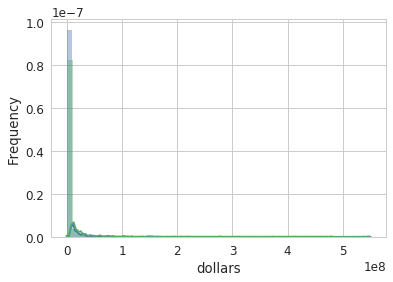

In [17]:
#Plot the distributions of revenue and marketcap and label the plots
#Take a look at http://seaborn.pydata.org/generated/seaborn.distplot.html
sns.distplot(us_listed["Revenue"])
sns.distplot(us_listed["MarketCap"])
plt.xlabel("dollars")
plt.ylabel("Frequency")

In [18]:
#TRansform both variables
us_listed["log_Revenue"] = np.log10(us_listed["Revenue"])
us_listed["log_MarketCap"] = np.log10(us_listed["MarketCap"])

/opt/anaconda/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  
/opt/anaconda/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log10
  
/opt/anaconda/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until


In [19]:
#Fix the infinity values
us_listed = us_listed.replace([np.inf,-np.inf],np.nan)#log(0) = infinity, we're basically discarding the rows with 0 dollars
us_listed = us_listed.dropna()

/opt/anaconda/anaconda3/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/opt/anaconda/anaconda3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


Text(0, 0.5, 'Frequency')

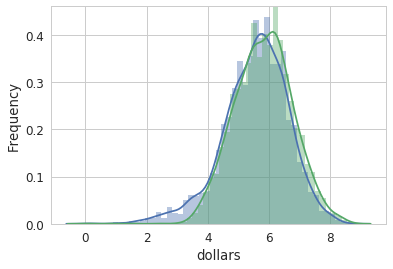

In [20]:
#Plot the distributions of revenue and marketcap and label the plots
#Take a look at http://seaborn.pydata.org/generated/seaborn.distplot.html
sns.distplot(us_listed["log_Revenue"])
sns.distplot(us_listed["log_MarketCap"])
plt.xlabel("dollars")
plt.ylabel("Frequency")

/opt/anaconda/anaconda3/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


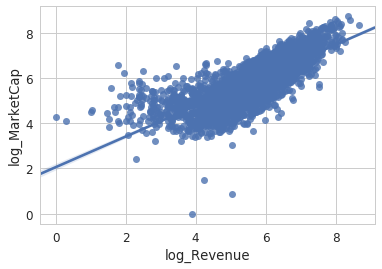

In [21]:
sns.regplot(x="log_Revenue",y="log_MarketCap",data=us_listed)